## DATA3960 - Capstone Project - Group 3 

### Impact of Property Features on Property Pricing

# Common Columns Across Both Datasets

## Property Details
- **Prop Class**: The classification of the property (e.g., SF for Single Family, VLOT for Vacant Lot).
- **Area/City**: The city or area where the property is located.
- **Community**: The neighborhood or community name.
- **Status**: Indicates the property status (e.g., Active (A) or Sold (S)).
- **List Price**: The listing price of the property.
- **Postal Code**: The postal code where the property is located.
- **Sold Date**: The date the property was sold (null for active listings).
- **Sold Price**: The final price for which the property was sold.
- **Listing ID #**: A unique identifier for the property listing.
- **DOM (Days on Market)**: The number of days the property has been listed.
- **FlrArea SF**: The floor area of the property in square feet.
- **TotFlrArea**: Total floor area, likely including all levels.
- **Rooms AG**: Number of above-ground rooms.
- **Bedrms AG**: Number of above-ground bedrooms.
- **Beds**: Total number of bedrooms.
- **Full Baths**: Number of full bathrooms.
- **Half Baths**: Number of half bathrooms.
- **Baths**: Total number of bathrooms.
- **Ensuite**: Whether the property has an ensuite bathroom.
- **Yr Built**: The year the property was built.
- **Style**: Architectural style (e.g., bungalow, two-story).
- **Front Exp**: Front exposure direction of the property.
- **FrontageM**: Property frontage in meters.
- **FP Y/N**: Whether the property has a fireplace (Y/N).
- **Encl Park**: Enclosed parking availability.
- **PARKING**: Details about parking (e.g., garage type, number of spaces).
- **Condo Name**: Name of the condo (if applicable).
- **Construction Type**: The type of construction (e.g., wood frame, concrete).
- **FLOORING**: Types of flooring in the property (e.g., hardwood, carpet, etc.).
- **List Pr / SqFt**: Listing price per square foot.
- **# Finished Levels**: Number of finished levels in the property.
- **Cumulative DOM**: Cumulative days on market across all listings.
- **Bsmt Dev**: Basement development status (e.g., finished, unfinished).
- **Garage Y/N**: Indicates if the property has a garage.
- **Price**: Price attribute (could be a duplicate of "List Price" or "Sold Price").
- **Lot Sq Metres**: Lot size in square meters.
- **Carpet, Hardwood, Linoleum, Tile, Laminate, Vinyl Plank**: Flooring material details for the property (Y/N).
- **GEOCODE**: Geospatial identifier, possibly latitude/longitude.

## Columns Specific to Active Dataset
- **ACTIVE MONTH END**: The month-end date for when the property was still listed.
- **ActiveMonth**: The formatted version of the active month.
- **List Date**: The date the property was first listed.

## Columns Specific to Sold Dataset
- **Cumulative DOMLS**: Cumulative Days on Market in the local MLS (Multiple Listing Service).
- **Days On MLS**: Days on MLS for the current listing.


In [2]:
import pandas as pd
import numpy as np

# Load the datasets

active_data = pd.read_csv('/Users/glennbarnes/inputData/ActiveData_RealEstate_Edmonton_3960.csv', encoding='ISO-8859-1')
sold_data = pd.read_csv('/Users/glennbarnes/inputData/SoldData_RealEstate_Edmonton_3960.csv', encoding='ISO-8859-1')

# Display first few rows of the dataset
active_data.head()



/var/folders/j5/l4n1h3z533nbg7ks96r5chn80000gn/T/ipykernel_52889/1622288258.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  active_data = pd.read_csv('/Users/glennbarnes/inputData/ActiveData_RealEstate_Edmonton_3960.csv', encoding='ISO-8859-1')


,Prop Class,Area/City,Community,Status,List Price,Postal Code,Sold Date,Sold Price,Listing ID #,DOM,...,Carpet,Hardwood,Linoleum,Tile,Laminate,Vinyl Plank,GEOCODE,ACTIVE MONTH END,ActiveMonth,List Date
0,VLOT,Abee,Abee,A,40000,T0A 0A0,NaN,0,E4099928,1062,...,N,N,N,N,N,N,NaN,31-Jan-21,2021-01-31,2018-03-06
1,VLOT,Abee,Abee,A,40000,T0A 0A0,NaN,0,E4099928,1091,...,N,N,N,N,N,N,NaN,28-Feb-21,2021-02-28,2018-03-05
2,VLOT,Abee,Abee,A,39900,T0A 0A0,NaN,0,E4243467,114,...,N,N,N,N,N,N,NaN,31-Aug-21,2021-08-31,2021-05-09
3,VLOT,Abee,Abee,A,39900,T0A 0A0,NaN,0,E4243467,52,...,N,N,N,N,N,N,NaN,30-Jun-21,2021-06-30,2021-05-09
4,VLOT,Abee,Abee,A,39900,T0A 0A0,NaN,0,E4243467,83,...,N,N,N,N,N,N,NaN,31-Jul-21,2021-07-31,2021-05-09


In [3]:
sold_data.head()

,Prop Class,Area/City,Community,Status,List Price,Postal Code,Sold Date,Sold Price,Listing ID #,DOM,...,Garage Y/N,Price,Lot Sq Metres,Carpet,Hardwood,Linoleum,Tile,Laminate,Vinyl Plank,GEOCODE
0,VLOT,Abee,Abee,S,30000,T0A 0A0,2016-08-31,21000,E3403984,552,...,NaN,21000,8874.0,N,N,N,N,N,N,NaN
1,SF,Abee,Abee,S,74900,T0A 0A0,2023-07-27,67000,E4349931,17,...,Yes,67000,0.0,Y,Y,N,N,N,N,NaN
2,SF,Abee,Abee,S,150000,T0A 0A0,2024-11-15,137000,E4410726,29,...,Yes,137000,0.0,Y,N,Y,Y,N,N,NaN
3,SF,Acme,NaN,S,99900,T0M 0A0,2003-06-17,90000,E2310257,49,...,No,90000,0.0,Y,N,Y,N,N,N,2.0
4,SF,Acme,NaN,S,209900,T0M 0A0,2009-04-22,203000,E3177447,46,...,No,203000,0.0,N,N,N,Y,Y,N,2.0


In [30]:
# Check for missing values and data types
missing_values_active = active_data.isnull().sum()
missing_values_sold = sold_data.isnull().sum()

data_types_active = active_data.dtypes
data_types_sold = sold_data.dtypes

# Concatenating them horizontally
side_by_side = pd.concat(
    [missing_values_active, data_types_active, missing_values_sold, data_types_sold], 
    axis=1
)
side_by_side

,0,1,2,3
Prop Class,0,object,0.0,category
Area/City,0,object,0.0,category
Community,7525,object,17615.0,category
Status,0,object,0.0,category
List Price,0,int64,0.0,int64
Postal Code,2,object,26841.0,category
Sold Date,626812,object,0.0,category
Sold Price,0,int64,0.0,int64
Listing ID #,0,object,0.0,category
DOM,0,int64,0.0,int64


In [34]:
# Identify categorical columns with dtype 'object'
categorical_columns = sold_data.select_dtypes(include=['object']).columns

# Convert these columns to 'category' type
sold_data[categorical_columns] = sold_data[categorical_columns].astype('category')

# Verify the changes
sold_data.dtypes

Prop Class           category
Area/City            category
Community            category
Status               category
List Price              int64
Postal Code          category
Sold Date            category
Sold Price              int64
Listing ID #         category
DOM                     int64
FlrArea SF            float64
TotFlrArea            float64
Rooms AG                int64
Bedrms AG               int64
Beds                    int64
Full Baths              int64
Half Baths              int64
Baths                 float64
Ensuite              category
Yr Built                int64
Style                category
Front Exp            category
FrontageM             float64
FP Y/N               category
Encl Park               int64
PARKING              category
Condo Name           category
Construction Type    category
FLOORING             category
List Pr / SqFt        float64
# Finished Levels       int64
Cumulative DOM          int64
Cumulative DOMLS        int64
Days On ML

In [16]:
categorical_columns

Index(['Prop Class', 'Area/City', 'Community', 'Status', 'Postal Code',
       'Sold Date', 'Listing ID #', 'Ensuite', 'Style', 'Front Exp', 'FP Y/N',
       'PARKING', 'Condo Name', 'Construction Type', 'FLOORING', 'Bsmt Dev',
       'Garage Y/N', 'Carpet', 'Hardwood', 'Linoleum', 'Tile', 'Laminate',
       'Vinyl Plank'],
      dtype='object')

In [35]:
# Check for duplicate records
duplicates = sold_data.duplicated().sum()

# Handling missing values: Checking percentage of missing values per column
missing_values = sold_data.isnull().sum()
missing_percentage = (missing_values / len(sold_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

# Drop columns with more than 50% missing values
columns_to_drop = missing_data[missing_data['Percentage'] > 50].index

# Return the count of duplicates
duplicates


0

In [36]:
missing_percent_sold = (missing_values_sold / len(sold_data)) * 100
print(pd.DataFrame({'Missing Values': missing_values_sold, 'Percentage': missing_percent_sold}))

                   Missing Values  Percentage
Prop Class                      0    0.000000
Area/City                       0    0.000000
Community                   17615    3.616672
Status                          0    0.000000
List Price                      0    0.000000
Postal Code                 26841    5.510933
Sold Date                       0    0.000000
Sold Price                      0    0.000000
Listing ID #                    0    0.000000
DOM                             0    0.000000
FlrArea SF                      0    0.000000
TotFlrArea                      0    0.000000
Rooms AG                        0    0.000000
Bedrms AG                       0    0.000000
Beds                            0    0.000000
Full Baths                      0    0.000000
Half Baths                      0    0.000000
Baths                           0    0.000000
Ensuite                         0    0.000000
Yr Built                        0    0.000000
Style                       14211 

In [38]:
# Imputing missing values
# Numerical columns -> Impute with median
numerical_cols = sold_data.select_dtypes(include=['int64', 'float64']).columns
sold_data[numerical_cols] = sold_data[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Categorical columns -> Impute with mode
categorical_cols = sold_data.select_dtypes(include=['object']).columns
sold_data[categorical_cols] = sold_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that missing values have been handled
missing_values_after = sold_data.isnull().sum().to_frame(name='Missing Values After')
missing_values_after


,Missing Values After
Prop Class,0
Area/City,0
Community,17615
Status,0
List Price,0
Postal Code,26841
Sold Date,0
Sold Price,0
Listing ID #,0
DOM,0


### Handling Missing Values

- Impute with Mode: `Garage Y/N`, `Construction Type`, `FLOORING`, `Bsmt Dev`, `Community`, `Postal Code`.
- Drop Columns: `Condo Name`, `PARKING`, `Front Exp`, `Style`.
- No Action: Columns with 0 missing values.

In [39]:
# Columns with few missing values
few_missing_columns = ['Garage Y/N', 'Construction Type', 'FLOORING', 'Bsmt Dev']

# Impute with mode for categorical columns
for col in few_missing_columns:
    sold_data[col].fillna(sold_data[col].mode()[0], inplace=True)

# Columns with many missing values
many_missing_columns = ['Condo Name', 'PARKING', 'Front Exp', 'Style']

# Drop columns with too many missing values
sold_data.drop(columns=many_missing_columns, inplace=True)

# Columns with moderate missing values
moderate_missing_columns = ['Community', 'Postal Code']

# Impute with mode for categorical columns
for col in moderate_missing_columns:
    sold_data[col].fillna(sold_data[col].mode()[0], inplace=True)

# Verify no missing values remain
print(sold_data.isnull().sum())

Prop Class           0
Area/City            0
Community            0
Status               0
List Price           0
Postal Code          0
Sold Date            0
Sold Price           0
Listing ID #         0
DOM                  0
FlrArea SF           0
TotFlrArea           0
Rooms AG             0
Bedrms AG            0
Beds                 0
Full Baths           0
Half Baths           0
Baths                0
Ensuite              0
Yr Built             0
FrontageM            0
FP Y/N               0
Encl Park            0
Construction Type    0
FLOORING             0
List Pr / SqFt       0
# Finished Levels    0
Cumulative DOM       0
Cumulative DOMLS     0
Days On MLS          0
Bsmt Dev             0
Garage Y/N           0
Price                0
Lot Sq Metres        0
Carpet               0
Hardwood             0
Linoleum             0
Tile                 0
Laminate             0
Vinyl Plank          0
GEOCODE              0
dtype: int64


/var/folders/j5/l4n1h3z533nbg7ks96r5chn80000gn/T/ipykernel_52889/1294418708.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sold_data[col].fillna(sold_data[col].mode()[0], inplace=True)
/var/folders/j5/l4n1h3z533nbg7ks96r5chn80000gn/T/ipykernel_52889/1294418708.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [40]:
# Summary statistics for numerical columns
numerical_summary = sold_data.describe() #.transpose()  # Transpose for better readability

# Summary statistics for categorical columns
categorical_summary = sold_data.describe(include=['category']) #.transpose()  # Transpose for better readability

# Display numerical summary with a clear header
print("=== Numerical Columns Summary ===")
print(numerical_summary)

# Display categorical summary with a clear header
print("\n=== Categorical Columns Summary ===")
print(categorical_summary)


=== Numerical Columns Summary ===
         List Price    Sold Price            DOM     FlrArea SF  \
count  4.870500e+05  4.870500e+05  487050.000000  487050.000000   
mean   3.247322e+05  3.166596e+05      50.760860    1330.941524   
std    1.905695e+05  1.832253e+05      59.658338     566.083321   
min    1.000000e+03  1.000000e+03       0.000000       0.000000   
25%    1.950000e+05  1.899000e+05      16.000000    1022.570000   
50%    3.090000e+05  3.000000e+05      33.000000    1216.320000   
75%    4.099000e+05  4.000000e+05      66.000000    1579.930000   
max    2.500000e+07  1.840000e+07    4154.000000   47361.160000   

          TotFlrArea       Rooms AG      Bedrms AG           Beds  \
count  487050.000000  487050.000000  487050.000000  487050.000000   
mean      123.648634       5.634516       2.585539       3.178858   
std        52.590911       1.718795       0.856820       1.112386   
min         0.000000       0.000000       0.000000       0.000000   
25%        95.000

In [41]:
active_data.shape, sold_data.shape

((627319, 48), (487050, 41))

### Further analysis will be for the sold data

- For categorical variables: Highly unique columns like Listing ID #, Postal Code, and Community may not be useful for predictive modeling.
- Potentially useful categorical features include PARKING, FLOORING, Style, Front Exp, Construction Type, Bsmt Dev, and Prop Class.
- Some columns (Status, Laminate, Vinyl Plank) have only one unique value, making them redundant for analysis.

In [42]:
area_city_distribution = sold_data['Area/City'].value_counts()
print(area_city_distribution)

Area/City
Edmonton         325501
St. Albert        29329
Sherwood Park     28238
Spruce Grove      14519
Leduc             12189
                  ...  
Islay                 1
Springbrook           1
Kitscoty              1
Rycroft               1
Leslieville           1
Name: count, Length: 309, dtype: int64


In [43]:
area_city_distribution.head(25)

Area/City
Edmonton             325501
St. Albert            29329
Sherwood Park         28238
Spruce Grove          14519
Leduc                 12189
Fort Saskatchewan     10751
Cold Lake              8611
Beaumont               7346
Stony Plain            7298
Morinville             4827
Wetaskiwin             4712
Drayton Valley         2980
Bonnyville Town        2413
Devon                  2410
Gibbons                1773
Vegreville             1718
Westlock               1453
St. Paul Town          1440
Redwater               1157
Calmar                 1106
Barrhead               1054
Bon Accord              881
Tofield                 864
Lamont                  796
Millet                  763
Name: count, dtype: int64

In [44]:
edmonton_sold_data = sold_data[sold_data['Area/City'] == 'Edmonton']
edmonton_sold_data.head()

,Prop Class,Area/City,Community,Status,List Price,Postal Code,Sold Date,Sold Price,Listing ID #,DOM,...,Garage Y/N,Price,Lot Sq Metres,Carpet,Hardwood,Linoleum,Tile,Laminate,Vinyl Plank,GEOCODE
30603,COND,Edmonton,Abbottsfield,S,38900,T5W 1W8,2000-01-21,38200,E2000253,17,...,No,38200,0.0,Y,N,Y,N,N,N,2010.0
30604,COND,Edmonton,Abbottsfield,S,49900,T5W 4R4,2000-07-06,49600,E2001520,166,...,No,49600,0.0,N,Y,Y,N,N,N,2010.0
30605,COND,Edmonton,Abbottsfield,S,37649,T0A 1N0,2000-04-01,37500,E2001858,64,...,No,37500,0.0,Y,N,Y,N,N,N,2010.0
30606,COND,Edmonton,Abbottsfield,S,48800,T5W 4S9,2000-02-14,46000,E2002860,5,...,No,46000,0.0,Y,N,Y,N,N,N,2010.0
30607,COND,Edmonton,Abbottsfield,S,46500,T5W 4R4,2000-07-16,46250,E2003445,147,...,No,46250,0.0,Y,N,Y,Y,N,N,2010.0


In [45]:
edmonton_sold_data.shape

(325501, 41)

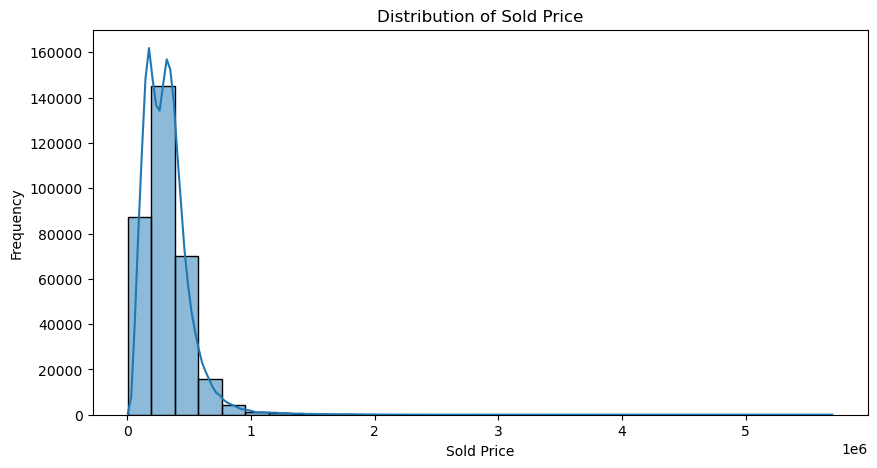

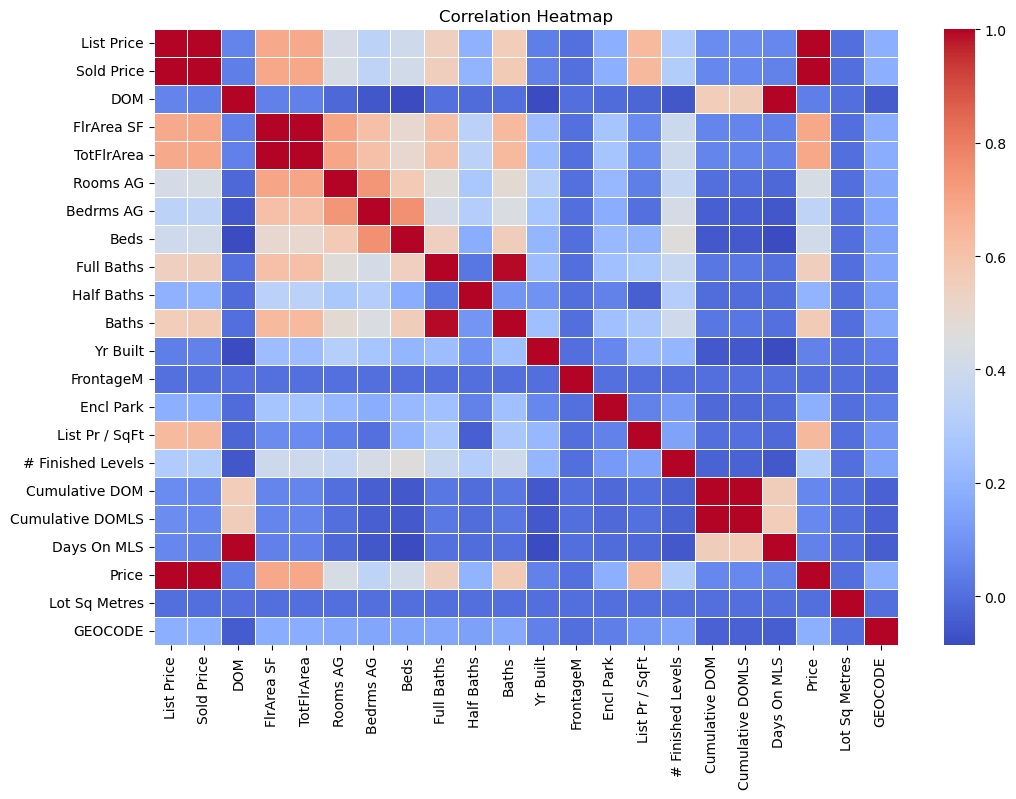

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(edmonton_sold_data['Sold Price'], bins=30, kde=True)
plt.xlabel("Sold Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sold Price")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = edmonton_sold_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [47]:
# Identifying influential numerical features based on correlation
correlation_threshold = 0.3  # Minimum absolute correlation threshold for selection

# Select only numeric columns for correlation calculation
numeric_columns = edmonton_sold_data.select_dtypes(include=['number']).columns

# Compute correlations with 'Sold Price' (ensure 'Sold Price' is numeric)
if 'Sold Price' in numeric_columns:
    numerical_correlations = edmonton_sold_data[numeric_columns].corr()['Sold Price'].abs().sort_values(ascending=False)
    important_numerical_features = numerical_correlations[numerical_correlations > correlation_threshold].index.tolist()
else:
    raise ValueError("'Sold Price' column is not numeric or does not exist in the DataFrame.")

# Handling categorical features - Checking their impact on Sold Price using ANOVA
from scipy.stats import f_oneway

significant_categorical_features = []

for cat in categorical_cols:
    if edmonton_sold_data[cat].nunique() > 1:  # Ensure the column has variability
        groups = [edmonton_sold_data['Sold Price'][edmonton_sold_data[cat] == category] for category in edmonton_sold_data[cat].unique()]
        try:
            stat, p_value = f_oneway(*groups)
            if p_value < 0.05:  # Statistically significant impact
                significant_categorical_features.append(cat)
        except:
            continue

# Combining numerical and categorical important features
selected_features = important_numerical_features + significant_categorical_features

# Display selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Price', 'Sold Price', 'List Price', 'FlrArea SF', 'TotFlrArea', 'List Pr / SqFt', 'Baths', 'Full Baths', 'Rooms AG', 'Beds', 'Bedrms AG', '# Finished Levels']


# Selected Influential Features for Property Pricing in Edmonton

Based on correlation analysis and ANOVA tests, the following features significantly influence property prices:

---

## **Numerical Features (High Correlation with Sold Price)**

- **Price, Sold Price, List Price** – Strongly correlated as expected.
- **Total Floor Area & Floor Area SF** – Larger properties tend to be more expensive.
- **Enclosed Parking, Full Baths, Baths** – More amenities increase price.
- **List Price per SqFt, Rooms AG, Beds, Bedrooms AG** – Property size and configuration impact value.

---

## **Significant Categorical Features (Statistically Impactful)**

- **Property Type (Prop Class)** – Different types of properties (e.g., single-family, duplex) have different price ranges.
- **Location (Area/City, Community, Postal Code)** – Location influences market demand.
- **Style, Front Exposure (Front Exp)** – Architectural design and orientation affect desirability.
- **Fireplace (FP Y/N), Parking Type (PARKING), Basement Development (Bsmt Dev)** – Features that add value to a home.
- **Garage Availability (Garage Y/N)** – Having a garage impacts property value.
- **Flooring Type (FLOORING, Carpet, Hardwood, Linoleum, Tile)** – Certain flooring types may add luxury or durability.

---

## **Next Steps: Feature Engineering & Predictive Modeling**

1. **Feature Encoding** – Convert categorical variables into numerical form.
   ```python
   edmonton_sold_data_encoded = pd.get_dummies(edmonton_sold_data, columns=categorical_columns, drop_first=True)

In [48]:
# Export cleaned edmonton_sold_data to a CSV file
edmonton_sold_data.to_csv('cleaned_edmonton_sold_data.csv', index=False)